### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [144]:
import pandas as pd

df = pd.read_csv('uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [145]:
df

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
...,...,...,...,...
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  829275 non-null  datetime64[ns]
 1   Lat        829275 non-null  float64       
 2   Lon        829275 non-null  float64       
 3   Base       829275 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 25.3+ MB


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [155]:
# Convert the 'Date/Time' column to datetime format
#df['Date/Time']=pd.to_datetime(df['Date/Time'])

# Group by date and count the number of pickups
#df['Date']=df['Date/Time'].dt.date

#df.head()
#df.groupby('Date').count()
#df['Date'].value_counts()
#df.Date.value_counts().sort_index(ascending=True)
df.Date.value_counts().sort_values(ascending=False).index.values[0]
# Find the date with the highest number of pickups
#df.groupby('Date').count().nlargest(2)



datetime.date(2014, 8, 7)

In [150]:
df.head()

,Date/Time,Lat,Lon,Base,Date
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,2014-08-01
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,2014-08-01
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,2014-08-01
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,2014-08-01
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,2014-08-01


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [162]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups

df[df.Date==df.Date.value_counts().sort_values(ascending=False).index.values[0]].shape[0]

# Get the count of pickups on the highest date




32759

#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [79]:
# Count the number of unique TLC base companies

df.Base.nunique()


5

#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [165]:
# Group by TLC base company and count the number of pickups
#df.groupby('Base').count().sort_values(by='Date', ascending=False)
# Find the TLC base company with the highest number of pickups
df.groupby('Base').count().sort_values(by='Date', ascending=False).head(1).index.values[0]

'B02617'

In [168]:
df.Base.value_counts()

B02617    355803
B02598    220129
B02682    173280
B02764     48591
B02512     31472
Name: Base, dtype: int64

In [121]:
df['binnedhour']=df['Date/Time'].dt.floor('15min')

In [123]:
df.head(10)

,Date/Time,Lat,Lon,Base,time,Date,binnedhour
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,2014-08-01,2014-08-01,2014-08-01 00:00:00
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,2014-08-01,2014-08-01,2014-08-01 00:00:00
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,2014-08-01,2014-08-01,2014-08-01 00:00:00
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,2014-08-01,2014-08-01,2014-08-01 00:00:00
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,2014-08-01,2014-08-01,2014-08-01 00:00:00
5,2014-08-01 00:13:00,40.7349,-74.0033,B02512,2014-08-01,2014-08-01,2014-08-01 00:00:00
6,2014-08-01 00:15:00,40.7279,-73.9542,B02512,2014-08-01,2014-08-01,2014-08-01 00:15:00
7,2014-08-01 00:17:00,40.7210,-73.9937,B02512,2014-08-01,2014-08-01,2014-08-01 00:15:00
8,2014-08-01 00:19:00,40.7195,-74.0060,B02512,2014-08-01,2014-08-01,2014-08-01 00:15:00
9,2014-08-01 00:20:00,40.7448,-73.9799,B02512,2014-08-01,2014-08-01,2014-08-01 00:15:00


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [5]:
# Group by TLC base company and count the number of pickups




#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [182]:
# Extract the hour from the 'Date/Time' column
df['Date/Time'].dt.hour

# Group by hour and count the number of pickups


# Find the hour with the highest number of pickups




0          0
1          0
2          0
3          0
4          0
          ..
829270    23
829271    23
829272    23
829273    23
829274    23
Name: Date/Time, Length: 829275, dtype: int64

In [169]:
df.head()

,Date/Time,Lat,Lon,Base,Date
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,2014-08-01
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,2014-08-01
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,2014-08-01
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,2014-08-01
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,2014-08-01


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

<AxesSubplot:>

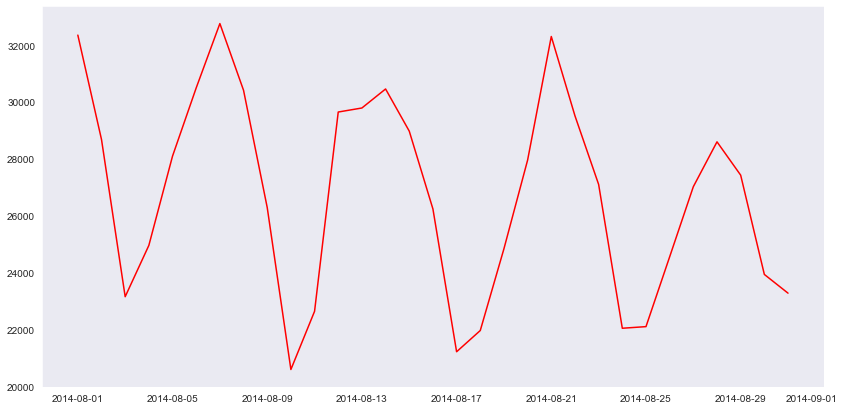

In [181]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
df.Date.value_counts().sort_index()

#df['BinnedHour'].value_counts().sort_index().plot(c='darkblue', alpha=0.8)

# Create a line plot to visualize the number of pickups over time
plt.figure(figsize=(14,7))
#df.Date.value_counts().sort_index().plot()
df.Date.value_counts().sort_index().plot(kind='line',color='red')

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

Text(0.5, 1.0, 'Latitude - Longitude Scatter Plot')

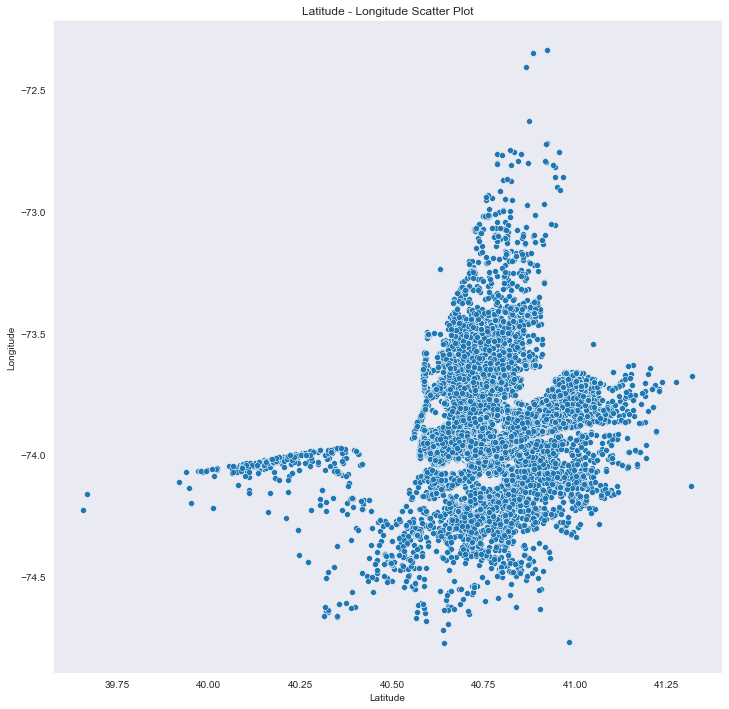

In [174]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
import seaborn as sns
plt.figure(figsize=(12,12))
sns.scatterplot(x='Lat',y='Lon',data=df,edgecolor='None',alpha=0.5,color='darkblue')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Latitude - Longitude Scatter Plot')

In [124]:
df.head()

,Date/Time,Lat,Lon,Base,time,Date,binnedhour
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,2014-08-01,2014-08-01,2014-08-01
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,2014-08-01,2014-08-01,2014-08-01
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,2014-08-01,2014-08-01,2014-08-01
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,2014-08-01,2014-08-01,2014-08-01
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,2014-08-01,2014-08-01,2014-08-01


#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

Text(0.5, 1.0, 'CountPlot: Total uber rides vs Base - July 2014, NYC')

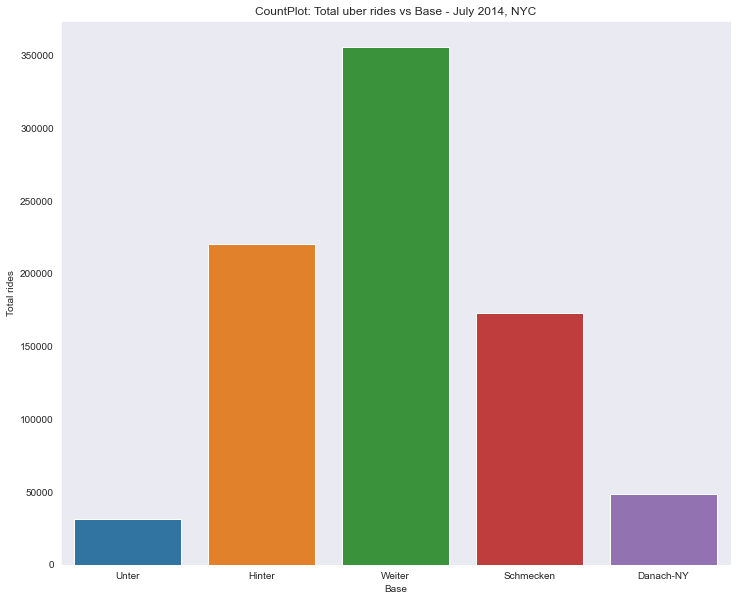

In [180]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
df.head()

BaseMapper={'B02512' : 'Unter', 'B02598' : 'Hinter', 'B02617' : 'Weiter', 'B02682' : 'Schmecken','B02764' : 'Danach-NY'}

#Count plot of Base
plt.figure(figsize=(12,10))
sns.set_style("dark")
sns.countplot(x=df['Base'].map(BaseMapper))
plt.ylabel('Total rides')
plt.title('CountPlot: Total uber rides vs Base - July 2014, NYC')

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

In [179]:
df.head()

,Date/Time,Lat,Lon,Base,Date
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,2014-08-01
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,2014-08-01
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,2014-08-01
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,2014-08-01
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,2014-08-01


In [185]:
# Group by day of the week and count the number of pickups

# Defining a dictionary to map the weekday to day name
DayMap = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['Day'] = df['Date/Time'].dt.weekday.map(DayMap)
df.head()
# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week


,Date/Time,Lat,Lon,Base,Date,Day
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,2014-08-01,Friday
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,2014-08-01,Friday
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,2014-08-01,Friday
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,2014-08-01,Friday
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,2014-08-01,Friday


<AxesSubplot:ylabel='Day'>

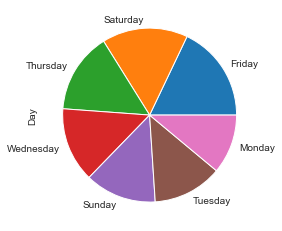

In [139]:
df.Day.value_counts().plot(kind='pie')

In [191]:
round(df['Day'].value_counts(normalize=True)*100)

Friday       18.0
Saturday     16.0
Thursday     15.0
Wednesday    14.0
Sunday       13.0
Tuesday      13.0
Monday       11.0
Name: Day, dtype: float64

In [177]:
df.Day.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Day'